In [ ]:
#Moving Average for COVID-19
#Reference
#https://towardsdatascience.com/modeling-covid-19-epidemic-with-python-bed21b8f6baf

In [18]:
#Installing libraries
#pip install pandas matplotlib scikit-learn
#or
#conda install -c anaconda pandas matplotlib scikit-learn

In [10]:
#Modeling COVID-19 epidemic with Python

#Import data and extracting fields
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [17]:
#Exploring the data US daily report
data = pd.read_csv("/Users/maraw/OneDrive/Documents/Regis Univ/DS Practicum I/us_daily_report/daily.csv")
print (data.columns)


Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dateChecked', 'death', 'hospitalized', 'lastModified',
       'total', 'totalTestResults', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')


In [18]:
data.head()


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200606,56,1916053,17862820.0,1796.0,30909.0,216259.0,6754.0,8920.0,3476.0,...,2020-06-06T00:00:00Z,19780669,19778873,19778873,746,1007,524103,23326,547429,ec8ad700549425fcbea2a43cc84a1d9d5bdc84dc
1,20200605,56,1892727,17338717.0,1749.0,31335.0,215252.0,6912.0,8863.0,3523.0,...,2020-06-05T00:00:00Z,19233193,19231444,19231444,1100,1440,522300,28615,550915,049411d107563da0cd8a0864bc267a80b46123ac
2,20200604,56,1864112,16816417.0,3474.0,31659.0,213812.0,7054.0,8787.0,3665.0,...,2020-06-04T00:00:00Z,18684003,18680529,18680529,884,-2828,444782,20797,465579,346ee956f287e783d7c182058085c9840357cb44
3,20200603,56,1843315,16371635.0,3556.0,32081.0,216640.0,7224.0,8688.0,3749.0,...,2020-06-03T00:00:00Z,18218506,18214950,18214950,971,2258,437066,20046,457112,5174063654cc33728ecaebda44ace05e0c0a95ac
4,20200602,56,1823269,15934569.0,4054.0,32728.0,214382.0,7403.0,8566.0,3852.0,...,2020-06-02T00:00:00Z,17761892,17757838,17757838,1168,1678,393648,23508,417156,5e2b49203edfff9e99b9012af1f1f92193d5311b


In [22]:
data['diff_hospitalizedCurrently'] = data['hospitalizedCurrently'].diff()
data['diff_totalTestResults'] = data['totalTestResults'].diff()
dates = data['date']
date_format = [pd.to_datetime(d, format = "%Y%m%d", errors="ignore") for d in dates]
date_format

[Timestamp('2020-06-06 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-05-30 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-05-28 00:00:00'),
 Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-05-26 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-05-19 00:00:00'),
 Timestamp('2020-05-18 00:00:00'),
 Timestamp('2020-05-17 00:00:00'),
 Timestamp('2020-05-16 00:00:00'),
 Timestamp('2020-05-15 00:00:00'),
 Timestamp('2020-05-14 00:00:00'),
 Timestamp('2020-05-13 00:00:00'),
 Timestamp('2020-05-12 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-

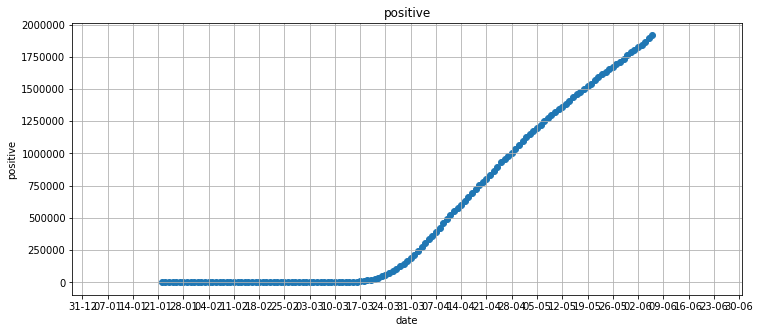

In [23]:
#Visualizing Data
variable = 'positive'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
fig.savefig(variable + '.png')
plt.show()

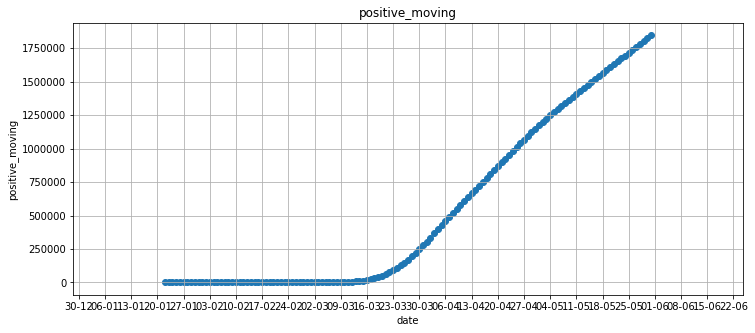

In [24]:
#Correcting Biases
rolling_average_days = 7
data['positive_moving'] = data['positive'].rolling(window=rolling_average_days).mean()
variable = 'positive_moving'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
fig.savefig(variable + '.png')
plt.show()

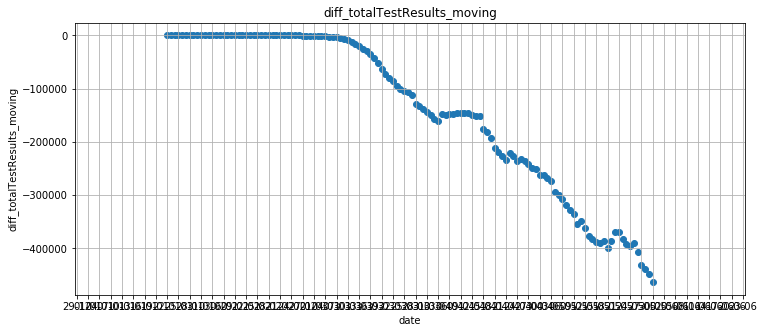

In [25]:
data['diff_totalTestResults_moving'] = data['totalTestResults'].diff().rolling(window=rolling_average_days).mean()

variable = 'diff_totalTestResults_moving'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

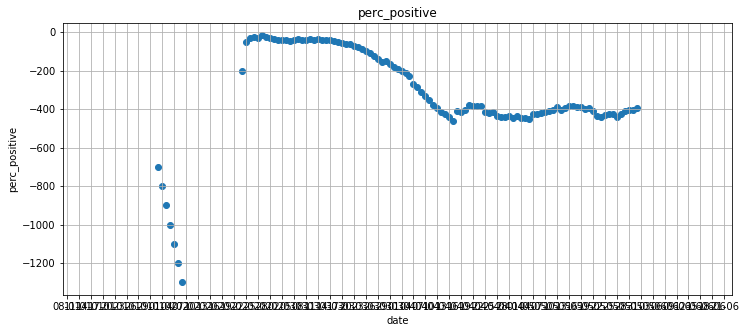

In [26]:

data['perc_positive'] = ((data['positive_moving'])/(data['diff_totalTestResults_moving'])*100)
variable = 'perc_positive'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

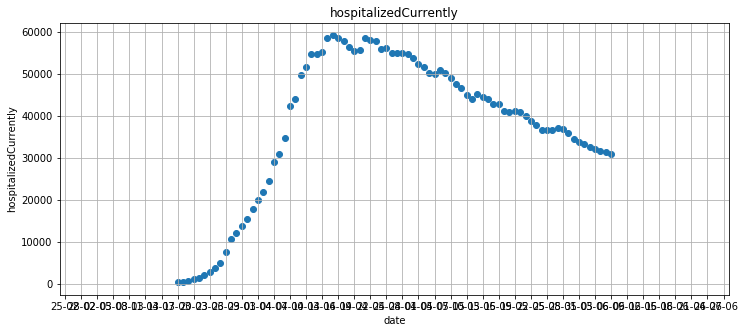

In [27]:
variable = 'hospitalizedCurrently'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

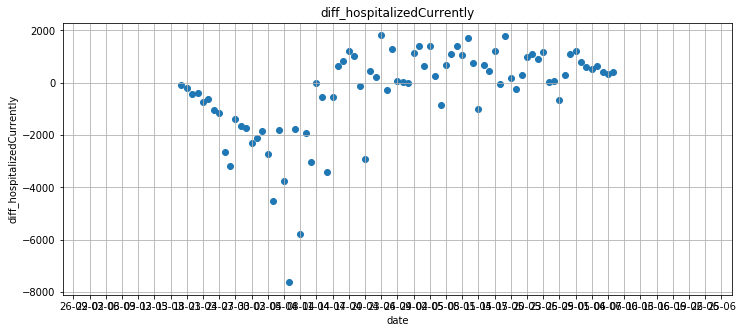

In [30]:
variable = 'diff_hospitalizedCurrently'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

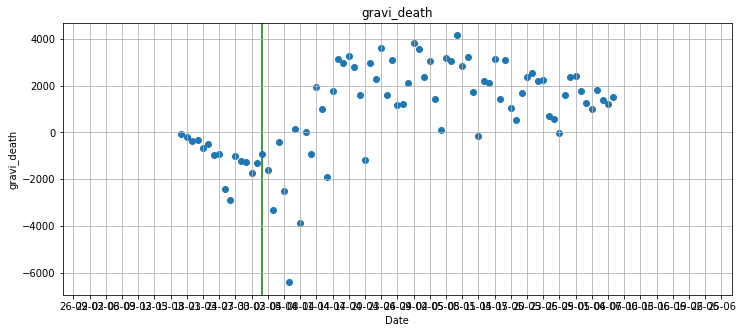

In [31]:
#Creating derived variable for the model

data['gravi_death'] = data['diff_hospitalizedCurrently'] + data['deathIncrease']
variable = 'gravi_death'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
ax.axvline(datetime(2020, 4, 1), c="green", zorder=0)
fig.savefig(variable + '.png')
plt.show()

In [49]:
d = data.dropna(subset = ["gravi_death"])
d

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,diff_hospitalizedCurrently,diff_totalTestResults,positive_moving,diff_totalTestResults_moving,perc_positive,gravi_death
1,20200605,56,1892727,17338717.0,1749.0,31335.0,215252.0,6912.0,8863.0,3523.0,...,522300,28615,550915,049411d107563da0cd8a0864bc267a80b46123ac,426.0,-547429.0,NaN,NaN,NaN,2.02006e+07
2,20200604,56,1864112,16816417.0,3474.0,31659.0,213812.0,7054.0,8787.0,3665.0,...,444782,20797,465579,346ee956f287e783d7c182058085c9840357cb44,324.0,-550915.0,NaN,NaN,NaN,2.02006e+07
3,20200603,56,1843315,16371635.0,3556.0,32081.0,216640.0,7224.0,8688.0,3749.0,...,437066,20046,457112,5174063654cc33728ecaebda44ace05e0c0a95ac,422.0,-465579.0,NaN,NaN,NaN,2.02006e+07
4,20200602,56,1823269,15934569.0,4054.0,32728.0,214382.0,7403.0,8566.0,3852.0,...,393648,23508,417156,5e2b49203edfff9e99b9012af1f1f92193d5311b,647.0,-457112.0,NaN,NaN,NaN,2.02006e+07
5,20200601,56,1799761,15540921.0,3455.0,33237.0,212704.0,7620.0,8485.0,3661.0,...,387600,16191,403791,55b24b047276220a01c78ae5361a3c0ff3d081f0,509.0,-417156.0,NaN,NaN,NaN,2.02006e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,20200321,56,28306,178121.0,3468.0,1436.0,1892.0,NaN,NaN,NaN,...,38387,6497,44884,90827dffec52647871820946c3830b101006ea5d,-719.0,-44344.0,62447.142857,-80342.142857,-77.726509,2.02003e+07
78,20200320,56,21809,139734.0,3330.0,1042.0,NaN,NaN,NaN,NaN,...,30440,5842,36282,a2c7aedb5a548cb18f35d440ac7c69e308fd7749,-394.0,-44884.0,50342.000000,-71832.285714,-70.082693,2.02003e+07
79,20200319,56,15967,109294.0,3016.0,617.0,NaN,NaN,NaN,NaN,...,23286,4385,27671,22be0d08de9f1bc045e3e658434a5c1669303dbc,-425.0,-36282.0,40065.428571,-62310.285714,-64.299863,2.02003e+07
80,20200318,56,11582,86008.0,2526.0,416.0,NaN,NaN,NaN,NaN,...,22015,2719,24734,adfec649176190442a025b6b67ab8fdf17619b40,-201.0,-27671.0,31627.428571,-51825.428571,-61.026854,2.02003e+07


In [50]:
from sklearn.linear_model import LogisticRegression

d["gravi_death"].isnull().values.any()


False

In [52]:
#Modeling the epidemic trend
import numpy as np
#from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)
#predictions = logmodel.predict(X_test)

dates = d['date']
date_format = [pd.to_datetime(d, format = "%Y%m%d", errors="ignore") for d in dates]

# prepare the lists for the model
X = date_format
y = d['gravi_death'].tolist()[1:]
# date format is not suitable for modeling, let's transform the date into incrementals number starting from April 1st
starting_date = 37  # April 1st is the 37th day of the series
day_numbers = []
for i in range(1, len(X)):
    day_numbers.append([i])
X = day_numbers
# # let's train our model only with data after the peak
X = X[starting_date:]
y = y[starting_date:]
# Instantiate Linear Regression
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(X, y)
print ("Log Regression Model Score: %s" % (log_regr.score(X, y)))

##Try it with linear regression

Log Regression Model Score: 0.023255813953488372


C:\Users\maraw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\maraw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [55]:

# Predict future trend
from sklearn.metrics import max_error
import math
y_pred = log_regr.predict(X)
error = max_error(y, y_pred)

In [56]:
X_test = []
future_days = 55
for i in range(starting_date, starting_date + future_days):
    X_test.append([i])
y_pred_log = log_regr.predict(X_test)

In [57]:
y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_log)):
    y_pred_max.append(y_pred_log[i] + error)
    y_pred_min.append(y_pred_log[i] - error)

In [71]:
date_format

[Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-06-04 00:00:00'),
 Timestamp('2020-06-03 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-05-31 00:00:00'),
 Timestamp('2020-05-30 00:00:00'),
 Timestamp('2020-05-29 00:00:00'),
 Timestamp('2020-05-28 00:00:00'),
 Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-05-26 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-05-24 00:00:00'),
 Timestamp('2020-05-23 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-05-21 00:00:00'),
 Timestamp('2020-05-20 00:00:00'),
 Timestamp('2020-05-19 00:00:00'),
 Timestamp('2020-05-18 00:00:00'),
 Timestamp('2020-05-17 00:00:00'),
 Timestamp('2020-05-16 00:00:00'),
 Timestamp('2020-05-15 00:00:00'),
 Timestamp('2020-05-14 00:00:00'),
 Timestamp('2020-05-13 00:00:00'),
 Timestamp('2020-05-12 00:00:00'),
 Timestamp('2020-05-11 00:00:00'),
 Timestamp('2020-05-10 00:00:00'),
 Timestamp('2020-05-09 00:00:00'),
 Timestamp('2020-05-

In [75]:
#print(type(data["date"]))
date_zero = datetime.strptime(str(date_format)[starting_date], '%Y-%m-%dT%H:%M:%S')

#data["date"]

ValueError: time data 'm' does not match format '%Y-%m-%d %H:%M:%S'

In [66]:
date_zero = data['date']

In [68]:
#Plot the forecast

# convert date of the epidemic peak into datetime format
#from datetime import datetime, timedelta
#date_zero = datetime.strptime(data['date'][starting_date], '%Y-%m-%dT%H:%M:%S')
date_zero = d['date']
# creating x_ticks for making the plot more appealing
date_prev = []
x_ticks = []
step = 5
data_curr = date_zero
x_current = starting_date
n = int(future_days / step)
for i in range(0, n):
    date_prev.append(str(data_curr.day) + "/" + str(data_curr.month))
    x_ticks.append(x_current)
    data_curr = data_curr + timedelta(days=step)
    x_current = x_current + step

AttributeError: 'Series' object has no attribute 'day'

In [4]:
# plot known data
plt.grid()
plt.scatter(X, y)
# plot linear regression prediction
plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
# plot maximum error
plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
#plot minimum error
plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
plt.xlabel('Days')
plt.xlim(starting_date, starting_date + future_days)
plt.xticks(x_ticks, date_prev)
plt.ylabel('gravi_deceduti')
plt.yscale("log")
plt.savefig("prediction.png")
plt.show()

NameError: name 'plt' is not defined

In [5]:

import math
def n_to_date(n):
    #it converts a number to a date, considering starting from starting_date
    return (date_zero + timedelta(days=n-starting_date)).strftime('%d/%m/%Y')
def build_line(x1,y1,x2,y2):
    m = float(y2 - y1)/(x2-x1)
    q = y1 - (m*x1)
    return [m,q]

data_zero = round(- linear_regr.intercept_ / linear_regr.coef_[0])

line_max = build_line(X_test[0][0], y_pred_max[0], X_test[1][0], y_pred_max[1])
data_zero_max = math.ceil(- line_max[1] / line_max[0])
data_zero_max = n_to_date(data_zero_max)

line_min = build_line(X_test[0][0], y_pred_min[0], X_test[1][0], y_pred_min[1])
data_zero_min = math.floor(- line_min[1] / line_min[0])
data_zero_min = n_to_date(data_zero_min)
print ()
print ("Zero intensive cares and deaths expected between %s and %s" % (data_zero_max, data_zero_min))

NameError: name 'linear_regr' is not defined

In [6]:
#Regional Trends
data = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")
zone1_df = data[data.denominazione_regione.isin(['Piemonte','Emilia-Romagna','Veneto','Lombardia'])]
zone1_df['deceduti'].sum()
print("Zone 1 accounts for %s percent of the total deaths" % (round(zone1_df['deceduti'].sum() / data['deceduti'].sum() * 100,2)))

NameError: name 'pd' is not defined

In [7]:
regions_dict = {'Emilia-Romagna': 8, 'Lombardia' : 3, 'Piemonte': 1,'Veneto': 5, 'Sicilia' : 19, "Marche" : 11}

rolling_average_days = 7

regional_data_list = []

for region_name, region_code in regions_dict.items():
    is_region = data['codice_regione'] == region_code
    data_region = data[is_region].copy()
    date = data_region['data']
    date_format = [pd.to_datetime(d) for d in date]
    data_region['nuovi_positivi'] = data_region['nuovi_positivi'].rolling(window=rolling_average_days).mean()
    data_region['diff_deceduti'] = data_region['deceduti'].diff().rolling(window=rolling_average_days).mean()
    data_region['tamponi_giornalieri'] = data_region['tamponi'].diff().rolling(window=rolling_average_days).mean()
    data_region['perc_positive'] = ((data_region['nuovi_positivi'])/(data_region['tamponi_giornalieri'])*100)
    data_region['gravi_deceduti'] =  data_region['diff_deceduti'] + data_region['terapia_intensiva']
    regional_data_list.append(data_region)

list_of_variables = ['perc_positive', 'gravi_deceduti']

for variable in list_of_variables:
    print("Creating regional charts for " + variable)
    fig, axs = plt.subplots(3, 2, sharey=True,figsize=(12, 8))
    fig.suptitle('Regional trend of ' + variable,fontsize = 'large')
    date_form = DateFormatter("%d-%m")
    counter = 0
    for ax in axs.flat:
        ax.scatter(date_format, regional_data_list[counter][variable])
        ax.set_title(regional_data_list[counter]['denominazione_regione'].iloc[0], fontsize='medium')
        ax.xaxis.set_major_formatter(date_form)
        # Ensure a major tick for each week using (interval=1)
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
        ax.grid()
        counter +=1
    fig.tight_layout()
    fig.savefig('Regional trend of ' + variable + '.png')
    plt.show()

NameError: name 'data' is not defined